In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ## In case of using other crimes:
# df = pd.read_pickle('./Data/INQ_DATA.pkl')
# #creat a series of other crimes
# corruption = df.loc[(df['offences'].str.contains( 'corrup',case = False) ==True) & ((df['offences'].str.contains( 'ativa',case = False) ==True) | (df['offences'].str.contains( 'passiv',case = False) ==True)) ]
# corruption.to_pickle('./Data/Corruption.pkl')

In [3]:
!pip install  -U statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 16.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
!mkdir Data
!mkdir Plottings
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/Corruption.pkl

--2022-06-08 16:13:56--  https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/Corruption.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979226 (956K) [application/octet-stream]
Saving to: ‘Corruption.pkl’

Corruption.pkl      100%[===================>] 956.28K  --.-KB/s    in 0.02s   

2022-06-08 16:13:56 (47.0 MB/s) - ‘Corruption.pkl’ saved [979226/979226]



In [5]:
df_corruption = pd.read_pickle('./Corruption.pkl')

In [6]:
!mkdir Plottings

mkdir: cannot create directory ‘Plottings’: File exists


In [7]:
df_corruption

,offences,region,title
date,,,
2009-11-03,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",AC,11.03.2009 - INQ 0007031-39.2014.4.01.3000 (JF...
2009-12-18,"SCI - Corrupção ativa, 5ª CCR - Corrupção ativa",AC,18.12.2009 - INQ 0015790-31.2010.4.01.3000 (JF...
2010-06-29,"SCI - Corrupção ativa, 5ª CCR - Corrupção ativa",AC,"29.06.2010 - INQ 00181/2010 (DPF/AC), PR-AC"
2010-07-10,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",AC,07.10.2010 - INQ 0002501-94.2011.4.01.3000 (JF...
2009-03-02,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",AL,"03.02.2009 - INQ 2009.80.00.001342-8 (JF-AL, 7..."
...,...,...,...
2014-03-09,"SCI - Estelionato Majorado, 2ª CCR - Esteliona...",AL,03.09.2014 - INQ 0000077-93.2017.4.05.8000 (JF...
2014-05-27,"SCI - Estelionato Majorado, 2ª CCR - Esteliona...",MA,"27.05.2014 - INQ 00078/2014 (DPF/CAX), PRM-CAX..."
2014-03-18,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",RN,18.03.2014 - IPL 0000544-41.2014.4.05.8400 (JF...


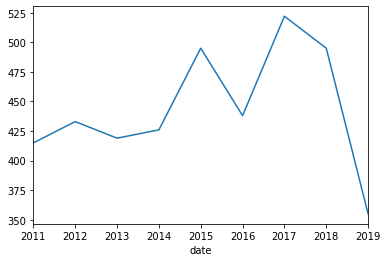

In [8]:
# Used the .sort_index() just to get rid off the deprecation warning
df_corruption.sort_index()['2011':'2019'].resample('Y').title.count().plot()

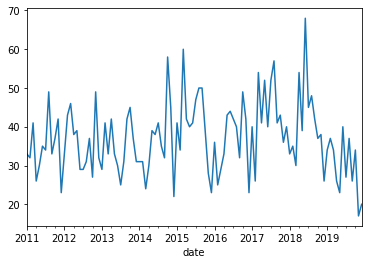

In [9]:
df_corruption.sort_index()['2011':'2019'].resample('M').title.count().plot()

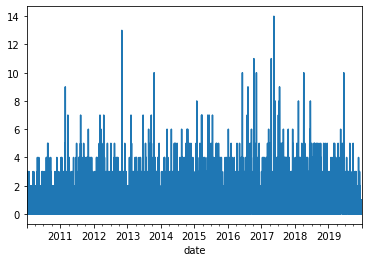

In [10]:
df_corruption.sort_index()['2010':'2019'].resample('D').title.count().plot()

In [11]:
states = pd.unique(df_corruption['region'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  import sys


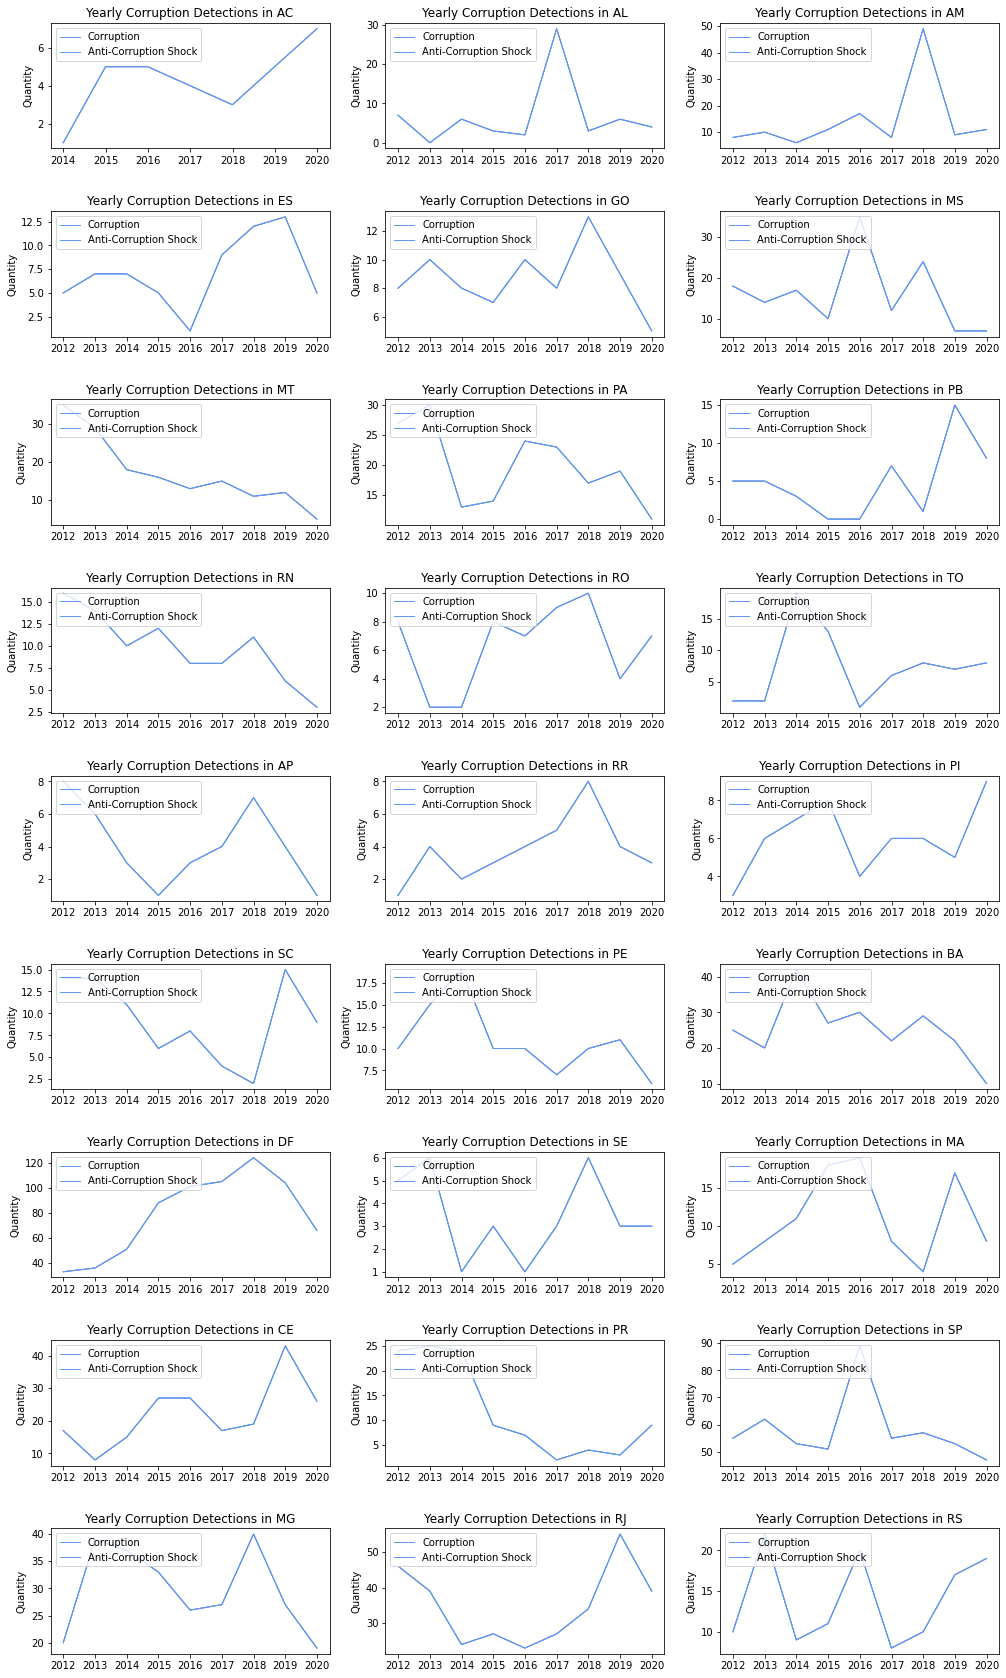

In [12]:
fig = plt.figure(figsize=(17,30))

fig.subplots_adjust(hspace = 0.5) # avoid x axis supperposition

for i in range(0,len(states),1):
    plt.subplot((len(states)/3),3,i+1)
    plt.plot((df_corruption['2011':'2019'].loc[df_corruption['2011':'2019']['region'].str.contains(states[i]) ==True].resample('Y').count()),color = 'cornflowerblue', lw = 1)
    #plt.axvline('2013', color='red', lw=1, alpha=1)  
    plt.legend(('Corruption','Anti-Corruption Shock'),loc=2)
    #plt.xlabel('Years')
    plt.ylabel('Quantity')
    plt.title('Yearly Corruption Detections in ' + states[i])
plt.show()
fig.savefig('./Plottings/states.pdf', transparent= True)

# Empirical Strategy

1 - Based on Miller (2009), I'll try to fit a polinomial curve after the relevant schok;
2 - Run a best fit regresion (lowess) in the entire set and check if there are points of spike and long term decrease

## 1 - Corruption Deterrence Empirical Model


Following Berlin, Qin and Spagnolo (2018) , a possible OLS regression (Poisson Regression) using feasible data from the Brazilian Federal Police of initiated investigations of corruption as dependent variable $Y$ can be expressed by:

$$Y_{t}=\beta_{0}+\beta_1 D_t+ \beta _2 T1^{n}_{t}+ \beta _3 T2^{n}_{t} + \beta_4 X_{t} + \varepsilon_{t}$$

For,

$t$= Month after January 2009; and 

$n$= Order of the intended tested polynomial.


Where

$Y_{t}$= Number of initiated investigations for corruption crimes (Or corruption Related Crimes);

$D_t$= Dummy for the impact of the enforcements, being 0 before August 2013 and 1 after;

$T1$= Time effect of all sample. Being 1 at the first observation 2 at the next and so on;

$T2$= Time effect from the beginning of the enforcement shock. Being 1 after august 2013, 2 in the next month and so on; and

$\varepsilon_{it}$= Is the error from functional predictions, it is expected to be normally distributed and i.i.d.


In order to test different shaped polynomials that might fit the expected detection curve,  the variables $T1$ and $T2$ can be tested on different order polynomials to check different goodness of fit.

In [13]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.summary2 import summary_col

!pip install Stargazer
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
#Yearly Variables
#Creating the yearly dataframe 
ydf = df_corruption['2011':'2019'].resample('Y').count()

ydf['cons'] = 1 


# creat a dummy with 0 before 2013 and 1 after #
dummy = []   
for i in (range(2010,2019)):
    if i < 2014:
        dummy.append(0)
    else:
        dummy.append(1)
        
ydf['dummy'] = dummy
ydf['year'] = range(2011,2020,1)
# creat a list of 1 to 10#
yt1 = list(range(1,10)) 

ydf['t1'] = yt1


# creat a polynomial root after 2013#
yt2= []                  # creat a polynom root after 2013#
for i in (range(2010,2019)):
    if i < 2015:
        yt2.append(0)
    else:
        yt2.append(i-2015)
ydf['t2'] = yt2
        
# Creating the higher order polynoms       
             
ydf['s1'] = np.power(yt1,2)
ydf['c1'] = np.power(yt1,3)
ydf['s2'] = np.power(yt2,2)
ydf['c2'] = np.power(yt2,3)
ydf['q2'] = np.power(yt2,3)
ydf['f2'] = np.power(yt2,3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
ydf.head(20)

,offences,region,title,cons,dummy,year,t1,t2,s1,c1,s2,c2,q2,f2
date,,,,,,,,,,,,,,
2011-12-31,415,415,415,1,0,2011,1,0,1,1,0,0,0,0
2012-12-31,433,433,433,1,0,2012,2,0,4,8,0,0,0,0
2013-12-31,419,419,419,1,0,2013,3,0,9,27,0,0,0,0
2014-12-31,426,426,426,1,0,2014,4,0,16,64,0,0,0,0
2015-12-31,495,495,495,1,1,2015,5,0,25,125,0,0,0,0
2016-12-31,438,438,438,1,1,2016,6,0,36,216,0,0,0,0
2017-12-31,522,522,522,1,1,2017,7,1,49,343,1,1,1,1
2018-12-31,495,495,495,1,1,2018,8,2,64,512,4,8,8,8
2019-12-31,355,355,355,1,1,2019,9,3,81,729,9,27,27,27


In [57]:
#CORRUPTION ONLY
results1 = sm.OLS(ydf['offences'], ydf[['cons','dummy']]).fit()
results2 = sm.OLS(ydf['offences'], ydf[['cons','dummy','t1','t2','s2','c2','q2','f2']]).fit()
results3 = sm.OLS(ydf['offences'], ydf[['cons','dummy','t1','t2','s1','s2']]).fit()
results4 = sm.OLS(ydf['offences'], ydf[['cons','dummy','t1','t2','s2','c2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['cons','dummy'])
HTML(stargazer.render_html())

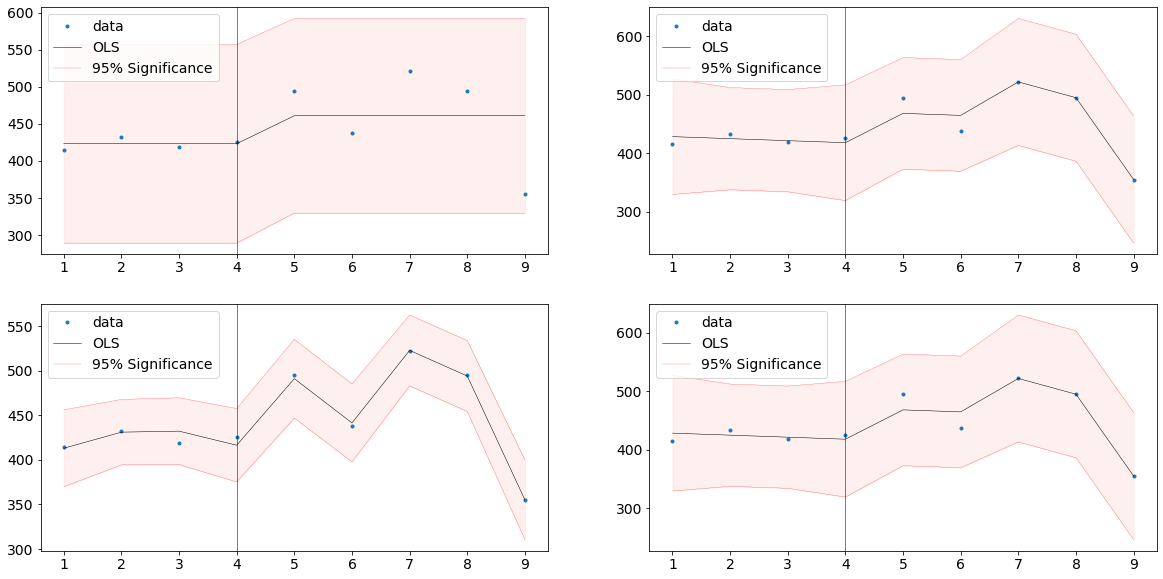

In [58]:

fig = plt.figure(figsize=(20,10))

result_list = [results1,results2,results3,results4]
theta = 4

for i in range(len(result_list)):
  plt.subplot(2,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( ydf['t1'], ydf['offences'], '.',lw=1)
  plt.plot(ydf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(ydf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( ydf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( ydf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

fig.savefig('emp3.pdf')

In [59]:
#Monthly

mdf = df_corruption['2011':'2019'].resample('M').count()

#create a constant

mdf['cons'] = 1


# creat a dummy with 0 before feb 2014 (x months) and 1 after # Change this to better fit### Lava Jato 17/marco 
intervention = 42

dummy = []    
for i in (range(0,len(mdf))):
    if i <intervention:
        dummy.append(0)
    else:
        dummy.append(1)
        
mdf['dummy'] = dummy

# creat a list of 1 to 13#
t1 = list(range(0,len(mdf)))  

mdf['t1'] = t1

# creat a polynom root after 2013#
t2= []                  
for i in (range(0,len(mdf))):
    if i < intervention:
        t2.append(0)
    else:
        t2.append(i-intervention)
        
mdf['t2'] = t2

#Creating other orther polynomials
        
mdf['s1'] = np.power(t1,2)
mdf['c1'] = np.power(t1,3)
mdf['s2'] = np.power(t2,2)
mdf['c2'] = np.power(t2,3)
mdf['q1'] = np.power(t1,4)
mdf['f1'] = np.power(t1,5)
mdf['q2'] = np.power(t2,4)
mdf['f2'] = np.power(t2,5)

mdf = mdf.fillna(0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
mdf.head(5)

,offences,region,title,cons,dummy,t1,t2,s1,c1,s2,c2,q1,f1,q2,f2
date,,,,,,,,,,,,,,,
2011-01-31,33,33,33,1,0,0,0,0,0,0,0,0,0,0,0
2011-02-28,32,32,32,1,0,1,0,1,1,0,0,1,1,0,0
2011-03-31,41,41,41,1,0,2,0,4,8,0,0,16,32,0,0
2011-04-30,26,26,26,1,0,3,0,9,27,0,0,81,243,0,0
2011-05-31,30,30,30,1,0,4,0,16,64,0,0,256,1024,0,0


In [61]:
#  Corruption 
results1 = sm.OLS(mdf['offences'], mdf[['cons','dummy']]).fit()
results2 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2']]).fit()
results3 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2']]).fit()
results4 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2']]).fit()
results5 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2']]).fit()
results6 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2','f2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['cons','dummy','t2','s2','c2','q2','f2'])
HTML(stargazer.render_html())

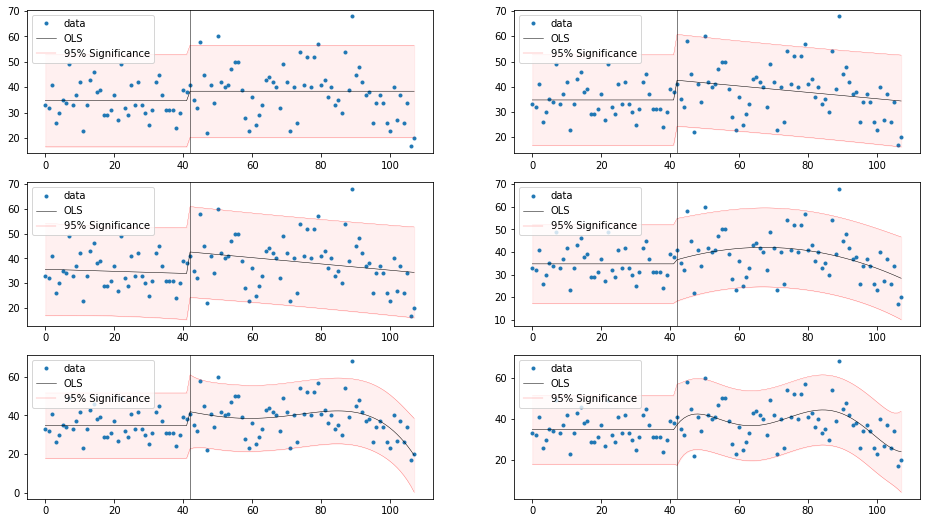

In [21]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

In [101]:
#  Corruption 
results1 = sm.Poisson(mdf['offences'], mdf[['cons','dummy']]).fit()
results2 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2']]).fit()
results3 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','t2']]).fit()
results4 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','s2']]).fit()
results5 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2']]).fit()
results6 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2','f2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['cons','dummy','t2','s2','c2','q2','f2'])
HTML(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 3.789512
         Iterations 4
Optimization terminated successfully.
         Current function value: 3.743470
         Iterations 4
Optimization terminated successfully.
         Current function value: 3.742067
         Iterations 4
Optimization terminated successfully.
         Current function value: 3.677123
         Iterations 9
Optimization terminated successfully.
         Current function value: nan
         Iterations 1
Optimization terminated successfully.
         Current function value: nan
         Iterations 1


/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1333: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + exposure + offset)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1243: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + offset + exposure)


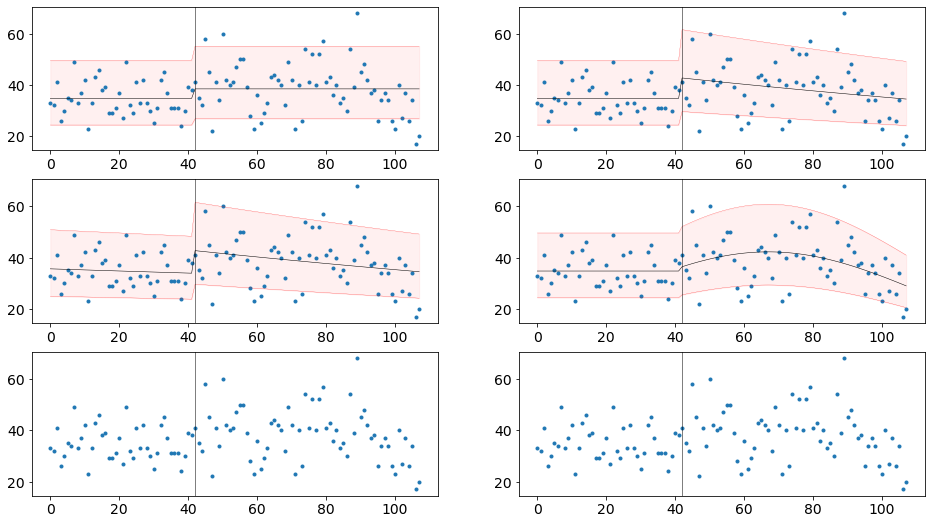

In [106]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = np.exp(result_list[i].fittedvalues.values - 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  iv_u1 = np.exp(result_list[i].fittedvalues.values + 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  #plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

# Multivariable Regressions

Adding, GDP growth, Unemployment rate and onther variables.

Adding state fixed effects.

In [74]:
#Download the data from my Github Repo
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/GDP.csv
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/unemployment2.csv
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/interest_rate.csv
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/IPCA.csv

--2022-06-08 16:38:40--  https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/GDP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2117 (2.1K) [text/plain]
Saving to: ‘GDP.csv.1’

GDP.csv.1           100%[===================>]   2.07K  --.-KB/s    in 0s      

2022-06-08 16:38:40 (32.8 MB/s) - ‘GDP.csv.1’ saved [2117/2117]

--2022-06-08 16:38:40--  https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/unemployment2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2362 (2.3K) [text/plain]
Saving to: ‘unem

In [75]:
# CSV dowloaded from 'ipeadata.gov.br' *Fonte: IPEA * Last trim expected
tgdp = pd.read_csv('./GDP.csv')

tgdp = tgdp.rename(columns={ 'PIB - preços de mercado - var. real trim. - (%) - Instituto Brasileiro de Geografia e Estatística- Sistema de Contas Nacionais Trimestrais (IBGE/SCN Trimestral) - SCN104_PIBPMG104': 'gdp'})
tgdp = pd.DataFrame(tgdp)
#dropting uncessary columns
tgdp = tgdp.drop(['Data'],1)

tgdp = tgdp/100
#creating the date column in datetime format:
tgdp['date'] = pd.date_range('1996-01-01','2020-01-01', freq='Q')

#setting a date index:
tgdp = tgdp.set_index('date')


#Arranging the data to fit Multivariate Monthly regression:
# taking average of quarterly growth to monthly observations: (other possible method is .pad() insted of .bfill())
mdf['gdp'] = tgdp['2008-12-01':'2019'].resample('M', closed = 'left').bfill()

mdf['gdp'] = mdf['gdp'].fillna( 'bfill')






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [76]:
# CSV dowloaded from 'ipeadata.gov.br' IBGE PNAD -CORREC FOR BEFORE 2012 from SEAD
unemployment = pd.read_csv('./unemployment2.csv')

unemployment = unemployment.rename(columns={ 'Taxa de desocupação - (%) - Instituto Brasileiro de Geografia e Estatística- Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua) - PNADC12_TDESOC12': 'unemployment'})
unemployment = pd.DataFrame(unemployment)
#dropting uncessary columns
unemployment = unemployment.drop(['Unnamed: 2','Data'],1)

unemplyment = unemployment/100
#creating the date column in datetime format:
unemployment['date'] = pd.date_range('2009','2020', freq='M')

#setting a date index:
unemployment = unemployment.set_index('date')

mdf['unemployment'] = unemployment['2009':'2020'].resample('M').sum()





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [77]:
# CSV dowloaded from 'ipeadata.gov.br'
interest = pd.read_csv('./interest_rate.csv')

interest = interest.rename(columns={ 'Taxa de juros - Over / Selic - (% a.m.) - Banco Central do Brasil- Boletim- Seção mercado financeiro e de capitais (Bacen/Boletim/M. Finan.) - BM12_TJOVER12': 'interest'})
interest = pd.DataFrame(interest)
#dropting uncessary columns
interest = interest.drop(['Unnamed: 2','Data'],1)
interes = interest/100

#creating the date column in datetime format:
interest['date'] = pd.date_range('1973-12-01','2020-02-01', freq='M')

#setting a date index:
interest = interest.set_index('date')

mdf['interest'] = interest['2009':'2020'].resample('M').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [78]:
# CSV dowloaded from 'ipeadata.gov.br'
inflation = pd.read_csv('./IPCA.csv')

inflation = inflation.rename(columns={ 'Inflação - IPCA - (% a.m.) - Instituto Brasileiro de Geografia e Estatística- Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_IPCAG12': 'interest'})
inflation = pd.DataFrame(inflation)
#dropting uncessary columns
inflation = inflation.drop(['Unnamed: 2','Data'],1)
inflation = inflation/100

#creating the date column in datetime format:
inflation['date'] = pd.date_range('1979-12-01','2020-01-01', freq='M')

#setting a date index:
inflation = inflation.set_index('date')

mdf['inflation'] = inflation['2008-12-01':'2019'].resample('M').sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [79]:
mdf['real_interest'] = mdf['inflation']*(mdf['interest']+1)


In [80]:
mdf = mdf.fillna(0)

In [81]:
#regressing

results1 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','gdp','unemployment','real_interest']]).fit()
results2 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','gdp','unemployment','real_interest']]).fit()
results3 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2','gdp','unemployment','real_interest']]).fit()
results4 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2','f2','gdp','unemployment','real_interest']]).fit()
results5 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2','gdp','unemployment','real_interest']]).fit()
results6 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2','f2','gdp','unemployment','real_interest']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['cons','dummy','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

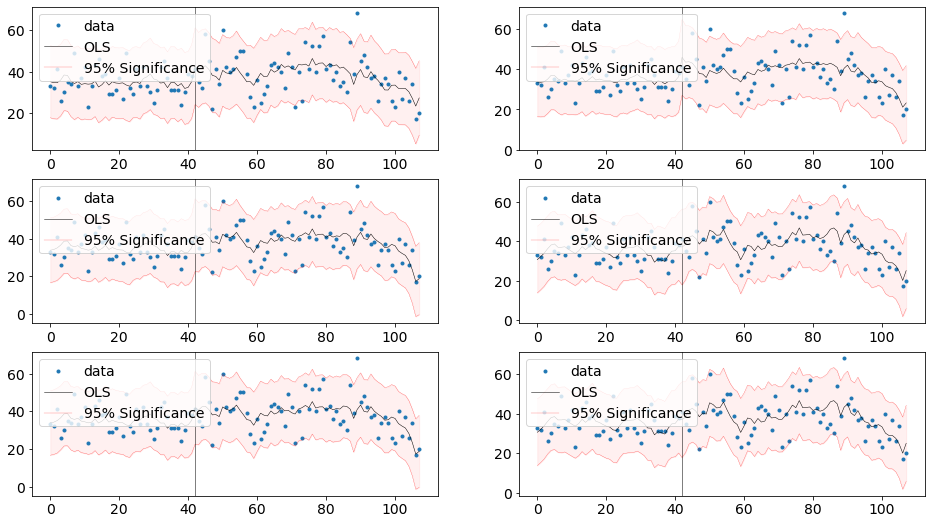

In [82]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

fig.savefig('emp3.pdf')

In [111]:
# 
results1 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results2 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','gdp','unemployment','real_interest']]).fit()
results3 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()
results4 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','s2','gdp','unemployment','real_interest']]).fit()
results5 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','t2','s2','gdp']]).fit()
results6 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','t2','s2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['cons','dummy','unemployment','real_interest','gdp'])
HTML(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 3.769145
         Iterations 4
Optimization terminated successfully.
         Current function value: 3.616192
         Iterations 5
Optimization terminated successfully.
         Current function value: 3.615074
         Iterations 5
Optimization terminated successfully.
         Current function value: 3.592079
         Iterations 9
Optimization terminated successfully.
         Current function value: 3.630250
         Iterations 9
Optimization terminated successfully.
         Current function value: 3.675719
         Iterations 9


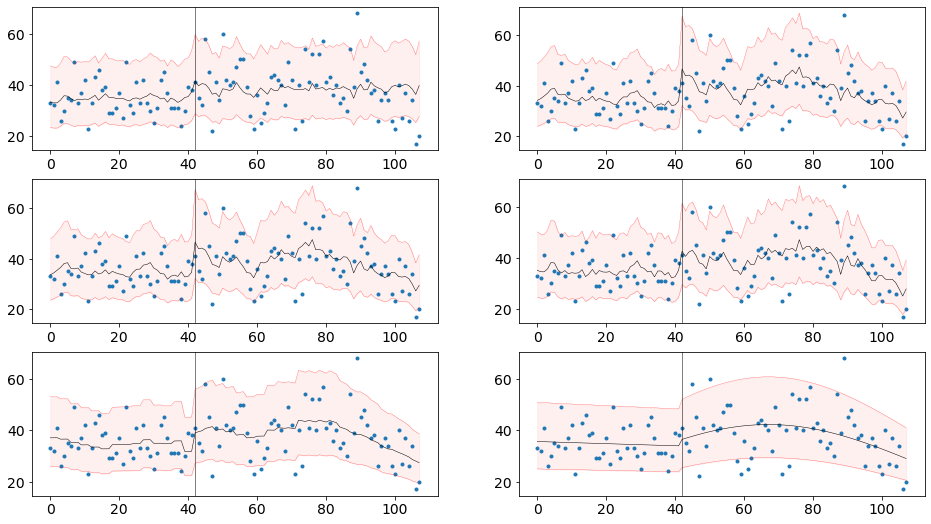

In [112]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = np.exp(result_list[i].fittedvalues.values - 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  iv_u1 = np.exp(result_list[i].fittedvalues.values + 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  #plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

In [113]:
#  Corruption 
results1 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results2 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t2','gdp','unemployment','real_interest']]).fit()
results3 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()
results4 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t2','s2','gdp','unemployment','real_interest']]).fit()
results5 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t1','t2','s2','gdp','unemployment','real_interest']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5])
stargazer.covariate_order(['cons','dummy','t2','s2','unemployment','real_interest','gdp'])
HTML(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 3.584325
         Iterations: 32
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 3.504898
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41
         Current function value: 3.504176
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 46
         Current function value: 4.645436
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4
         Current function value: 4.645428
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:593: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.

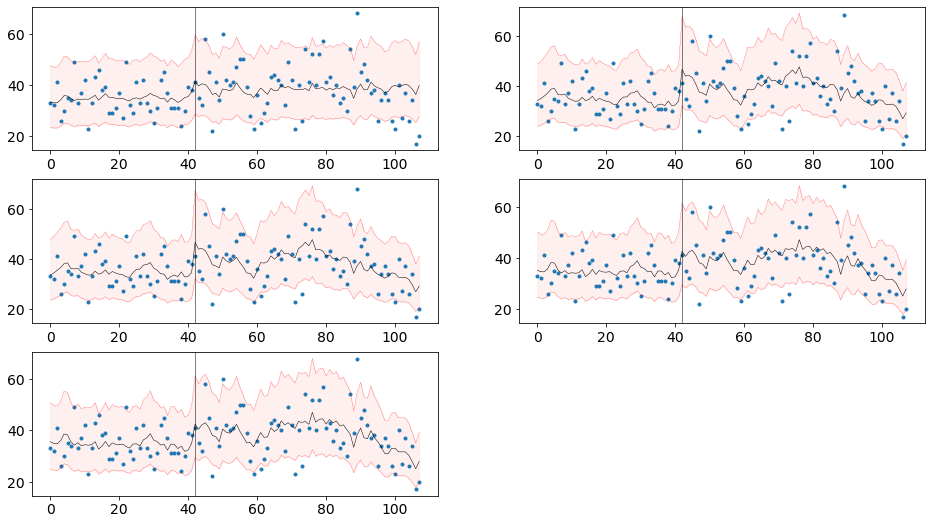

In [114]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = np.exp(result_list[i].fittedvalues.values - 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  iv_u1 = np.exp(result_list[i].fittedvalues.values + 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  #plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

In [36]:
import pylab
import seaborn as sns


pylab.rc("figure", figsize=(16, 8))
pylab.rc("font", size=14)



In [37]:
smoothed = sm.nonparametric.lowess(exog=mdf['t1'], endog= mdf['offences'], frac=0.2)

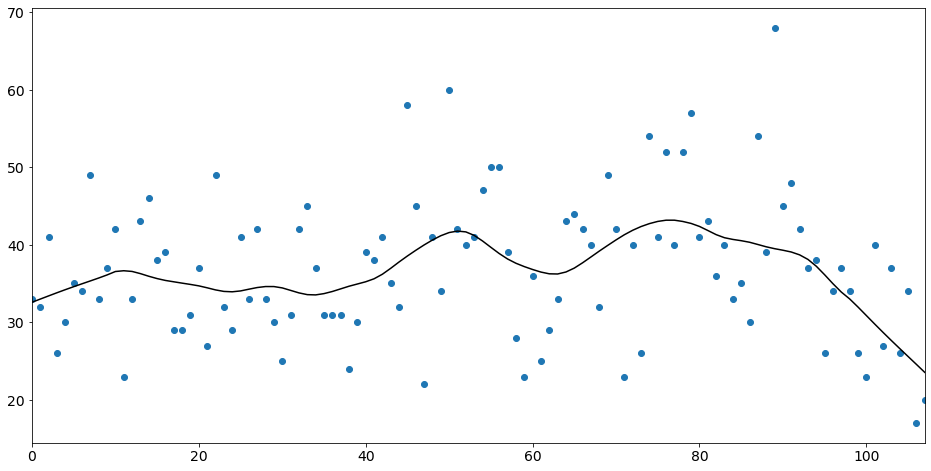

In [38]:
# Plot the fit line
fig, ax = pylab.subplots()

ax.scatter(mdf['t1'], mdf['offences'])
ax.plot(smoothed[:, 0], smoothed[:, 1], c="k")
pylab.autoscale(enable=True, axis="x", tight=True)

In [39]:
# Now create a bootstrap confidence interval around the a LOWESS fit


def lowess_with_confidence_bounds(
    x, y, eval_x, N=200, conf_interval=0.95, lowess_kw=None
):
    """
    Perform Lowess regression and determine a confidence interval by bootstrap resampling
    """
    # Lowess smoothing
    smoothed = sm.nonparametric.lowess(exog=x, endog=y, xvals=eval_x, **lowess_kw)

    # Perform bootstrap resamplings of the data
    # and  evaluate the smoothing at a fixed set of points
    smoothed_values = np.empty((N, len(eval_x)))
    for i in range(N):
        sample = np.random.choice(len(x), len(x), replace=True)
        sampled_x = x[sample]
        sampled_y = y[sample]

        smoothed_values[i] = sm.nonparametric.lowess(
            exog=sampled_x, endog=sampled_y, xvals=eval_x, **lowess_kw
        )

    # Get the confidence interval
    sorted_values = np.sort(smoothed_values, axis=0)
    bound = int(N * (1 - conf_interval) / 2)
    bottom = sorted_values[bound - 1]
    top = sorted_values[-bound]

    return smoothed, bottom, top




In [40]:
# Compute the 95% confidence interval
eval_x = np.linspace(0, 107, 31)
smoothed, bottom, top = lowess_with_confidence_bounds(
    mdf['t1'], mdf['offences'], eval_x, lowess_kw={"frac": 0.2}
)

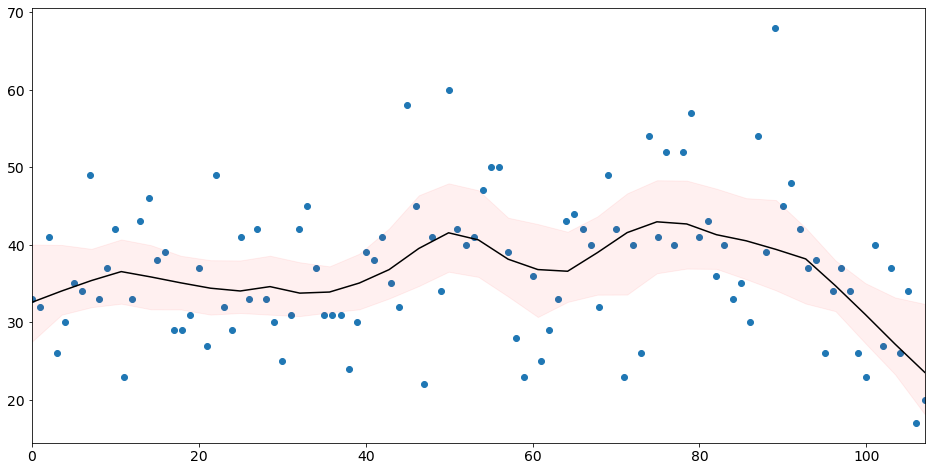

In [41]:
# Plot the confidence interval and fit
fig, ax = pylab.subplots()
ax.scatter(mdf['t1'], mdf['offences'])
ax.plot(eval_x, smoothed, c="k")
ax.fill_between(eval_x, bottom, top, alpha=0.06, color="r")
pylab.autoscale(enable=True, axis="x", tight=True)

In [42]:
## Daily data

ddf = df_corruption['2011':'2019'].resample('D').count()

#create a constant

ddf['cons'] = 1


# creat a dummy with 0 before feb 2014 (x days) and 1 after # Change this to better fit###
d_intervention = 504

dummy = []    
for i in (range(0,len(ddf))):
    if i <intervention:
        dummy.append(0)
    else:
        dummy.append(1)
        
ddf['dummy'] = dummy

# creat a list of 1 to 13#
t1 = list(range(0,len(ddf)))  

ddf['t1'] = t1

# creat a polynom root after 2013#
t2= []                  
for i in (range(0,len(ddf))):
    if i < intervention:
        t2.append(0)
    else:
        t2.append(i-intervention)
        
ddf['t2'] = t2

#Creating other orther polynomials
        
ddf['s1'] = np.power(t1,2)
ddf['c1'] = np.power(t1,3)
ddf['s2'] = np.power(t2,2)
ddf['c2'] = np.power(t2,3)
ddf['q1'] = np.power(t1,4)
ddf['f1'] = np.power(t1,5)
ddf['q2'] = np.power(t2,4)
ddf['f2'] = np.power(t2,5)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
# Creating the Daily data for the other exogenous variables



ddf['gdp'] = tgdp['2008-12-01':'2019'].resample('D', closed = 'left').bfill()

ddf['gdp'] = ddf['gdp'].fillna( 'bfill')

ddf['unemployment'] = unemployment['2009':'2020'].resample('D').sum()

ddf['unemployment'] = ddf['unemployment'].fillna( 'bfill')

ddf['inflation'] = inflation['2008-12-01':'2019'].resample('D').sum()

ddf['inflation'] = ddf['inflation'].fillna( 'bfill')

ddf['interest'] = interest['2009':'2020'].resample('D').sum()

ddf['interest'] = ddf['interest'].fillna( 'bfill')

ddf['real_interest'] = ddf['inflation']*(ddf['interest']+1)


In [118]:
#  Corruption 
results1 = sm.OLS(ddf['offences'], ddf[['cons','dummy']]).fit()
results2 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2']]).fit()
results3 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t1','t2']]).fit()
results4 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2']]).fit()
results5 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2']]).fit()
results6 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','f2']]).fit()
results7 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','gdp','unemployment','real_interest']]).fit()
results8 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','gdp','unemployment','real_interest']]).fit()
results9 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','gdp','unemployment','real_interest']]).fit()
results10 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','f2','gdp','unemployment','real_interest']]).fit()
results11 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','gdp','unemployment','real_interest']]).fit()
results12 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','f2','gdp','unemployment','real_interest']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6,results7, results8,results9,results10,results11,results12])
stargazer.covariate_order(['cons','dummy','t2','s2','c2','q2','f2','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

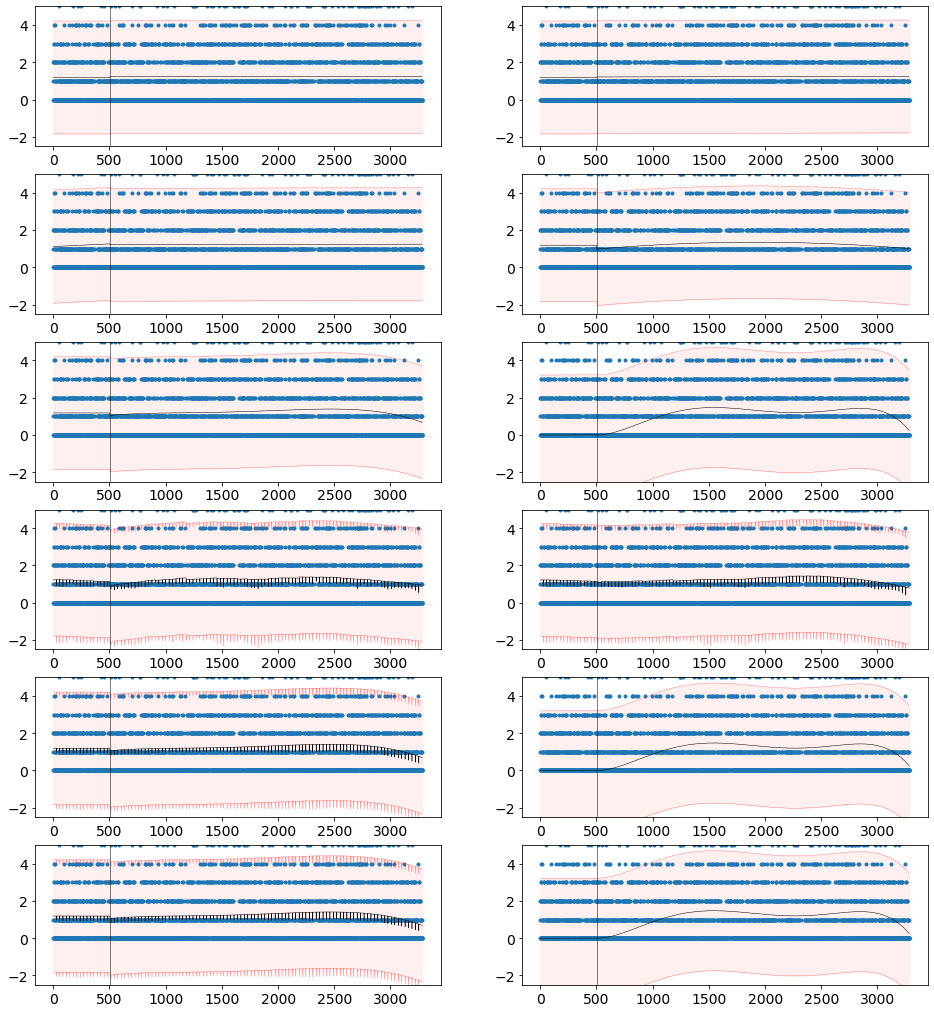

In [128]:

fig = plt.figure(figsize=(16,18))

result_list = [results1, results2,results3,results4,results5,results6,results7, results8,results9,results10,results11,results12]
theta = d_intervention

for i in range(len(result_list)):
  plt.subplot(6,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( ddf['t1'], ddf['offences'], '.',lw=.01)
  plt.plot(ddf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(ddf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( ddf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( ddf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.ylim((-2.5, 5))
  #plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

In [143]:
#  Corruption 
results1 = sm.Poisson(ddf['offences'], ddf[['cons','dummy']]).fit()
results2 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','t2']]).fit()
results3 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','t1','t2']]).fit()
results4 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results5 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','t2','gdp','unemployment','real_interest']]).fit()
results6 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()
stargazer = Stargazer([results1, results2,results3,results4, results5,results6])
stargazer.covariate_order(['cons','dummy','t1','t2','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 1.649449
         Iterations 4
Optimization terminated successfully.
         Current function value: 1.649429
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.649312
         Iterations 10
Optimization terminated successfully.
         Current function value: 1.647802
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.647793
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.647743
         Iterations 11


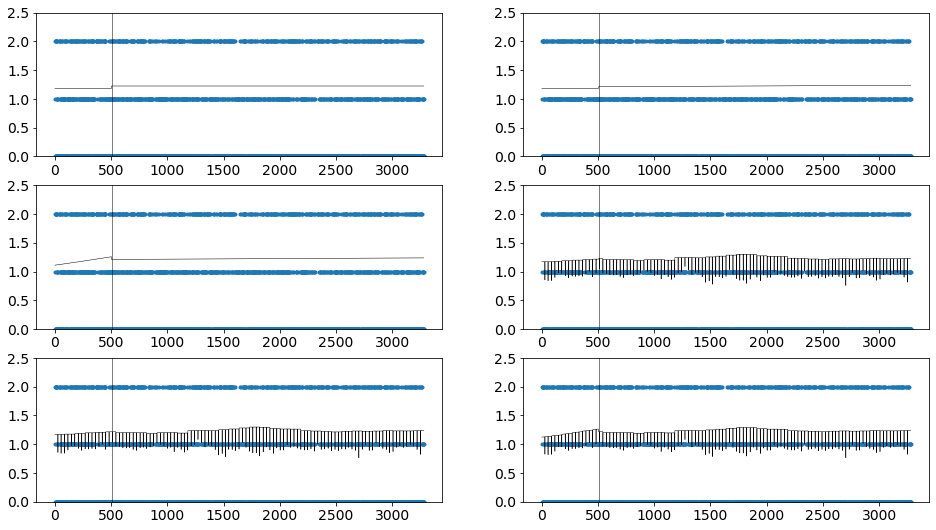

In [144]:

fig = plt.figure(figsize=(16,9))

result_list = [results1, results2,results3,results4, results5,results6]
theta = d_intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  #iv_l1 = np.exp(result_list[i].fittedvalues.values - 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  #iv_u1 = np.exp(result_list[i].fittedvalues.values + 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  plt.plot( ddf['t1'], ddf['offences'], '.',lw=.000001)
  plt.plot (ddf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  #plt.plot(ddf['t1'], iv_u1, color='red', lw=0.2)
  #plt.plot( ddf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.ylim((0, 2.5))
  #plt.fill_between( ddf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  #plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

In [138]:
np.exp(result_list[i].fittedvalues.values + 1.96*np.sqrt((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([1.13737686, 1.13757507, 1.13777331, ..., 1.25767913, 1.25768647,
       1.2576938 ])

In [141]:
#  Corruption 
results1 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy']]).fit()
results2 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','t2']]).fit()
results3 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','t1','t2']]).fit()
results1 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results2 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','t2','gdp','unemployment','real_interest']]).fit()
results3 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()

stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['cons','dummy','t2','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 1.525426
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 1.525416
         Iterations: 17
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 1.525358
         Iterations: 24
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 1.524568
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23


/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: invalid value encountered in multiply
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)


         Current function value: 1.524564
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 46


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: invalid value encountered in multiply
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)


         Current function value: 1.524539
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 49


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


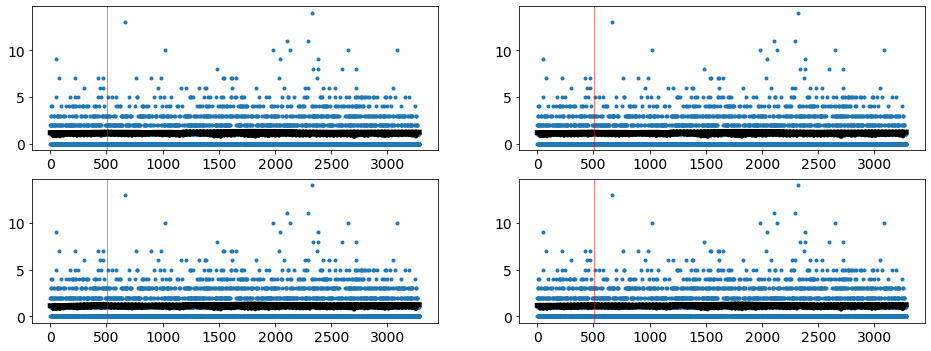

In [142]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4]
theta = d_intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  plt.plot( ddf['t1'], ddf['offences'], '.',lw=1)
  ax.set_ylim([0,2])
  plt.plot(ddf['t1'],np.exp(result_list[i].fittedvalues), 'k', lw=5)
  plt.axvline(theta, color='red', lw=1, alpha=0.5)
 # plt.legend(('data','OLS'),loc=2)

plt.show()

In [49]:
smoothed = sm.nonparametric.lowess(exog=ddf['t1'], endog= ddf['offences'], frac=0.2)

In [50]:
# Compute the 95% confidence interval
eval_x = np.linspace(0, len(ddf), 31)
smoothed, bottom, top = lowess_with_confidence_bounds(
    ddf['t1'], ddf['offences'], eval_x, lowess_kw={"frac": 0.3})

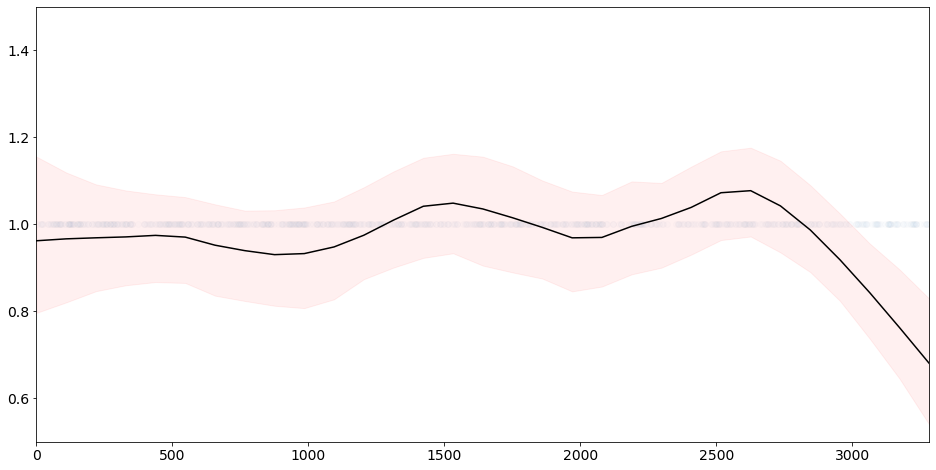

In [51]:
# Plot the confidence interval and fit
fig, ax = pylab.subplots()
ax.scatter(ddf['t1'], ddf['offences'],alpha=0.01)
ax.plot(eval_x, smoothed, c="k")
ax.set_ylim([0.5,1.5])
ax.fill_between(eval_x, bottom, top, alpha=0.06, color="r")
pylab.autoscale(enable=True, axis="x", tight=True)